# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club



LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.



In [14]:
#First import pandas library for data manipulation

import pandas as pd

In [111]:
#We have information about each column in the data set in the data_info.csv file
data_info = pd.read_csv('lending_club_info.csv',index_col = 'LoanStatNew')

In [9]:
#Have a look at the data!
pd.DataFrame(data_info)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [10]:
#looking into the description of a particular row
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [112]:
#Defining a function to get the description of a particular row
def feature_info(row_name):
    print(data_info.loc[row_name]['Description'])

In [12]:
#Checking the function now
feature_info('mort_acc')

Number of mortgage accounts.


In [17]:
#importing other libraries for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#why use matplotlib inline?
#It is a magic command that sets the backend of matplotlib to the 'inline' backend,
#  which means plotting right after the code
%matplotlib inline

In [18]:
#Now we will load the data set
df = pd.read_csv('lending_club_loan_two.csv')

In [101]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [17]:
#lets describe the data a bit
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


Step 1 : Exploratory Data Analysis

#Which variable is important?
#Summary Statistics
#Visualize the data

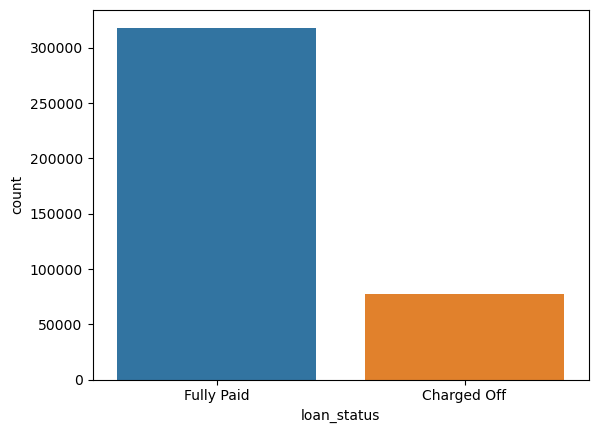

In [18]:
#We have to predict loan_status, so we create a countplot of the loan_status column

sns.countplot(x='loan_status',data=df,hue = 'loan_status')
plt.show()

In [19]:
#find proportion of the loan_status column
df.loan_status.value_counts(normalize = True)

#Looks like fully paid loans are 80% of the data set
#This shall help us in the future to decide on the model evaluation metric

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [20]:
#Lets have a look into the 
# loan_amnt column as it should be a good predictor

df.loan_amnt.head()

0    10000.0
1     8000.0
2    15600.0
3     7200.0
4    24375.0
Name: loan_amnt, dtype: float64

<Figure size 1200x800 with 0 Axes>

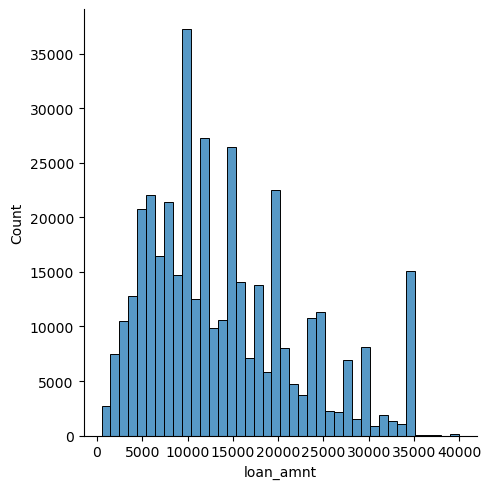

In [21]:
#Create a histogram of the loan_amnt column
#make it colorful and exciting!

plt.figure(figsize=(12,8))
sns.displot(df.loan_amnt,bins = 40,kde = False)
plt.show()

#Our observations:
#loan_amnt is a continuous variable
#loan_amnt is right skewed
#Most of the loans are around 10,000 to 20,000
#There are some outliers in the data set
#We can see that the loan_amnt is a good predictor
#Its median is around 13,000

In [22]:
#What are the continuous variables in the data set?
#We can find it by looking into the data_info.csv file
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [23]:
#An easy way to find the continuous variables is to find the unique values in the columns
df.emp_length.unique()
#This shows that emp_length is a categorical variable

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [24]:
#Explore correlation between the continuous variables using pearson correlation
#.corr() gives the correlation between the continuous variables by pearson correlation

df.corr(numeric_only=True) #only for continuous variables, not categorical variables

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


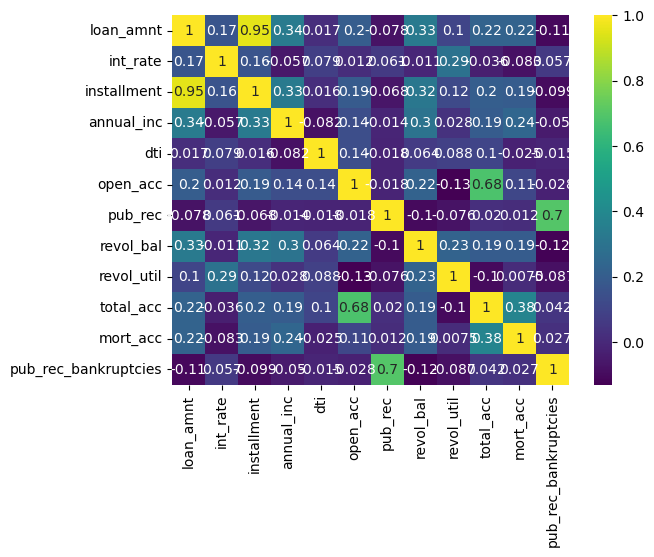

In [25]:
#lets visualise thuis correlation using a heatmap

sns.heatmap(df.corr(numeric_only=True),annot = True,cmap = 'viridis') #annot = True to show the values, cmap = 'viridis' for color
plt.Figure(figsize=(10,5))
plt.show()



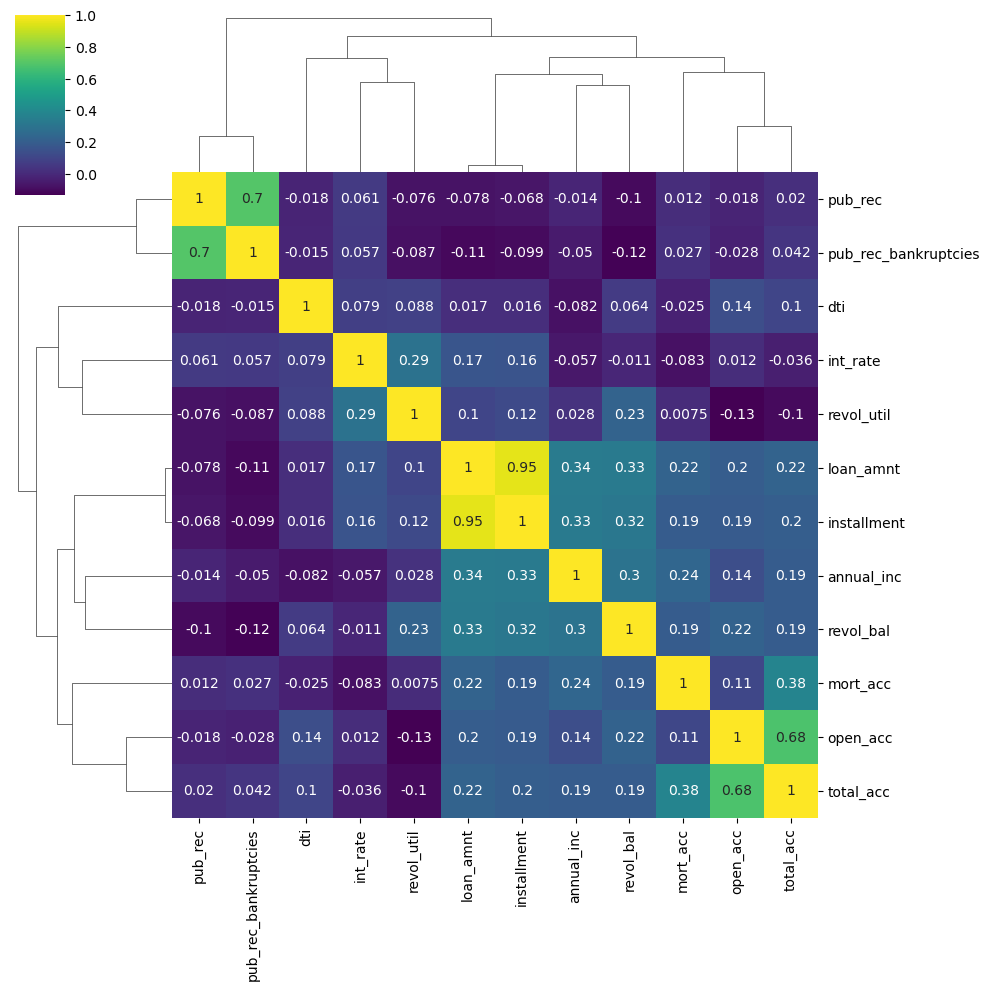

In [26]:
#can we have a clearer view of the heatmap?
#We can use the clustermap for that
sns.clustermap(df.corr(numeric_only=True),annot = True,cmap = 'viridis')
plt.show()
#What to notice here?
#We can see that there is a strong correlation between the installment and the 
# loan_amnt with correlation value of 0.95
#This is because the loan_amnt is the amount of the loan and the installment is the monthly payment
#We can also see a strong correlation between the pub_rec and pub_rec_bankruptcies
#This is because pub_rec_bankruptcies is the number of public record bankruptcies
#pub_rec is the number of derogatory public records
#We can also see a strong correlation between the total_acc and open_acc
#This is because total_acc is the total number of credit lines
#open_acc is the number of open credit lines in the borrower's credit file
#We can also see a strong correlation between the loan_amnt and the annual_inc ,value of correlation is 0.33
#This is because the annual_inc is the annual income of the borrower
#We can also see a strong correlation between the loan_amnt and the revol_bal ,value of correlation is 0.33
#Well I think enough of analuzing the correlation, lets move on to the next step

In [27]:
#Could I reduce the independent variables?
#Yes, we can reduce the independent variables by removing the highly correlated variables
#Can we use Principal Component Analysis?
#Yes, we can use Principal Component Analysis to reduce the independent variables
#We will try to reduce the independent variables in the future
#First lets do it without reducing the independent variables

In [28]:
#There is almost perfect correlation between the loan_amnt and the installment
data_info.loc['installment']['Description']

# So , Installment is the monthly payment owed by the borrower if the loan originates

'The monthly payment owed by the borrower if the loan originates.'

In [29]:
#Whats loan_amnt?
data_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

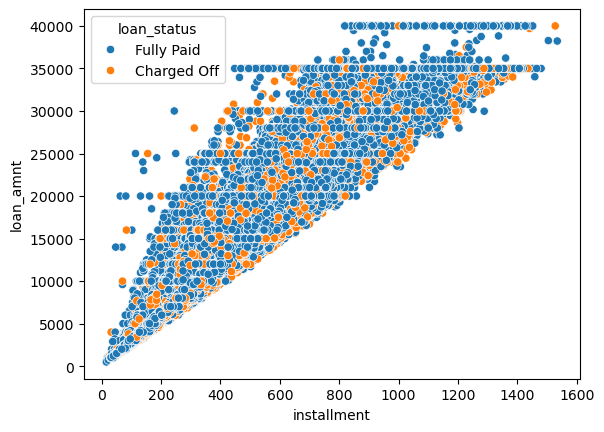

In [30]:
#Plot scatter plot between the loan_amnt and the installment
#  to see the correlation

sns.scatterplot(x='installment',y='loan_amnt',data=df, hue = 'loan_status')
plt.show()

#What do we observe in it from the hue?
#We can see that the fully paid loans are more in number
#We can see that the charged off loans are less in number
#We can see that the charged off loans are more in number for the higher loan amounts
#We can see that the fully paid loans are more in number for the lower loan amounts


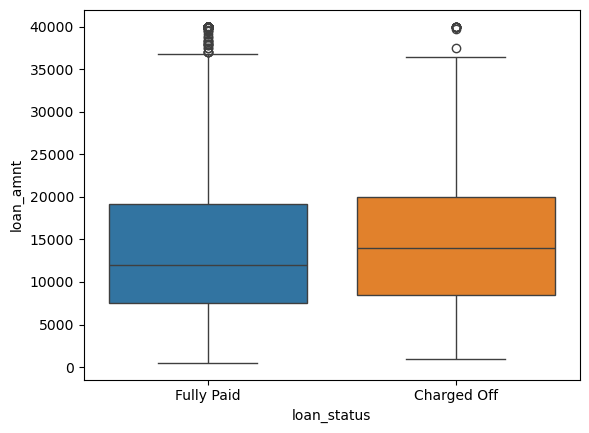

In [31]:
#Lets create a boxplot between the loan_status and the loan_amnt
#What does a boxplot show?
#A boxplot shows the distribution of the data and the outliers in the data
#  and the median of the data

sns.boxplot(x= 'loan_status',y='loan_amnt',data=df,hue = 'loan_status')
plt.show()

#What do we observe from boxplot here?
#We can see that the charged off loans have higher loan amounts 
# because the median is higher
#The fully paid loans have outliers in the loan amounts like 35,000, 40,000
#The charged off loans have outliers in the loan amounts like 35,000, 40,000


In [32]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [33]:
#Exploring Grade column
df['grade']

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [34]:
#Unique values in grade

print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [35]:
#Unique values in subgrades
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [36]:
#What is grade and subgrade, describe it?
#Grade is the LC assigned loan grade
#Subgrade is the LC assigned loan subgrade


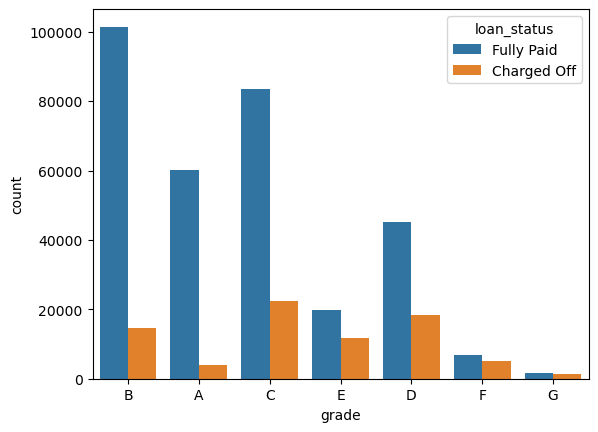

In [ ]:
#Countplot of the grade column
sns.countplot(x='grade',data=df, hue='loan_status')
plt.show()
#Grades beyond C seem to have more charged off loans 


In [ ]:
#plotting proportion of charged off loans of the fully paid ones for each grade
df.groupby('grade')['loan_status'].value_counts(normalize = True).unstack()

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


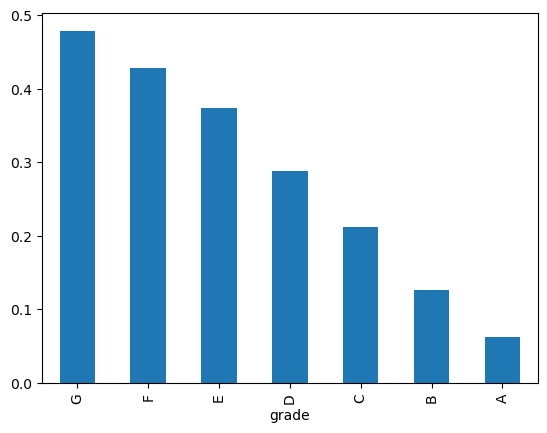

In [ ]:
df.groupby('grade')['loan_status'].value_counts(normalize = True).unstack()['Charged Off'].sort_values(ascending=False).plot(kind='bar')
plt.show()

#worse grades are Grade G and Grade F

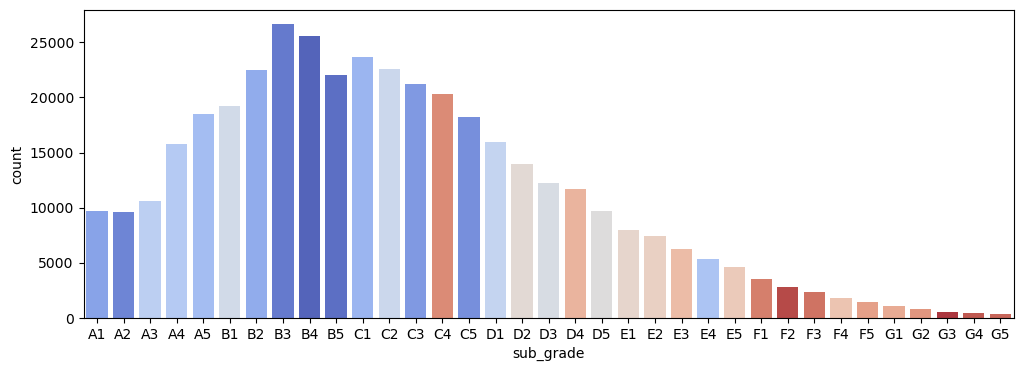

In [71]:
#countplot per subgrade

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade',data = df,order=subgrade_order,palette='coolwarm',hue = 'sub_grade')
plt.show()
#observations:
#There are more loans in the subgrade B3
#There are less loans in the subgrade G5


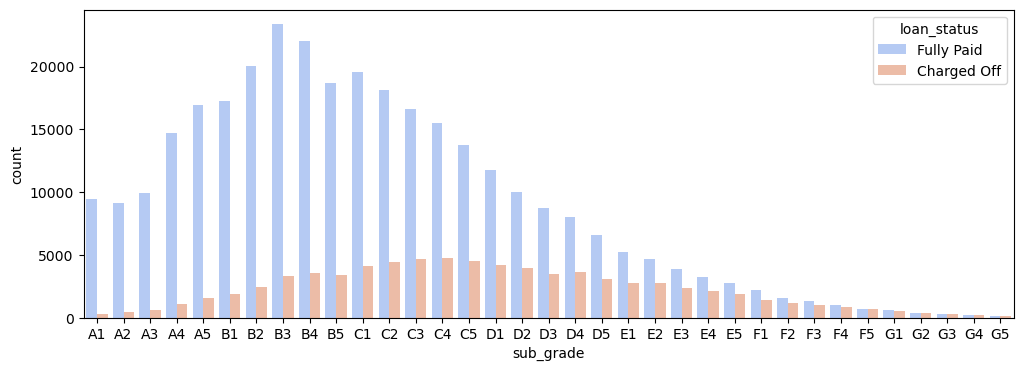

In [72]:
#plotting loan_status for each subgrade
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade',data = df,order=subgrade_order,palette='coolwarm',hue = 'loan_status')
plt.show()
#observations:
#There are more fully paid loans in the subgrade B3
#There are more charged off loans in the subgrade C5
#the worse subgrades are G5, F5, E5, D5, C5

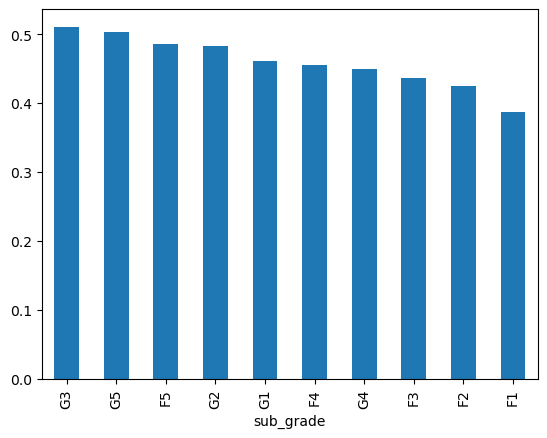

In [88]:
#Lets plot the proportion of charged off loans of the fully paid ones for sub_grades F and G only
df[(df['grade'] == 'G')|(df['grade'] == 'F')].groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'].sort_values(ascending=False).plot(kind='bar')
plt.show()
#observations:
#Worst subgrades are G3,G5,F5

In [19]:
#Creating a column called 'loan_repaid' which will contain 1 if the loan is fully paid and 0 if the loan is charged off
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

#Could i use some function or library to convert the loan_status column to loan_repaid column?
#Yes, we can use the map function to convert the loan_status column to loan_repaid column
#We can use the dictionary to map the values


In [93]:
df['loan_status'].unique()
#We can see that the loan_status column has only two unique values

array(['Fully Paid', 'Charged Off'], dtype=object)

In [94]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [ ]:
#lets drop the loan_status column
#df.drop('loan_status',axis=1,inplace=True)
#We will drop it later as we have used loan_status column for visualization

In [96]:
#Lets find the correlation of the loan_repaid column with the other columns
df.corr(numeric_only= True)['loan_repaid'].sort_values().drop('loan_repaid')
#observations:
#The loan_repaid column has a strong negative correlation with the int_rate column
#The loan_repaid column has a strong positive correlation with the annual_inc column


int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_repaid, dtype: float64

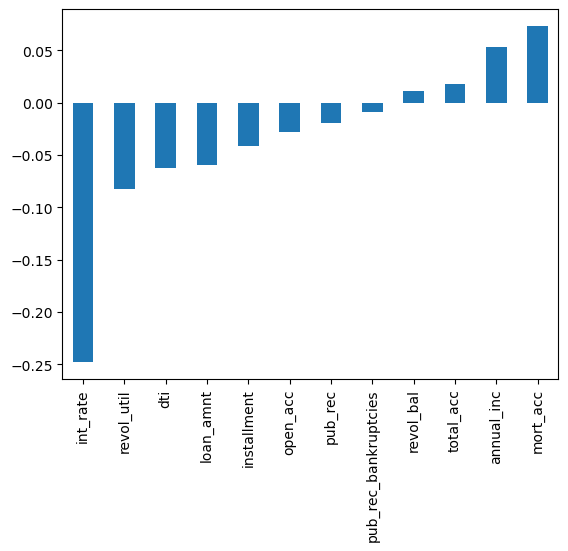

In [ ]:
#bar plot of the correlation of the loan_repaid column with the other columns
df.corr(numeric_only= True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')
plt.show()

Step 2: Data Preprocessing
Treating missing values, unnecessary/ repetitive features. Converting categorical string features to dummy variables.

In [99]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Missing Data Treatment

In [100]:
#There is no harm in finding its information!
df.info()
#Description of the data set
#The data set has 396030 rows and 27 columns
#The data set has 396030 entries in total
#Anytime we have a missing value, we will have less than 396030 entries
#yes, we have missing values in the data set
#Where are the missing values?
#We can find the missing values by using the isnull() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [20]:
#Lets find the missing values
pd.DataFrame(df.isnull().sum(),columns=['Missing Values'])

,Missing Values
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
df.isnull().mean()*100
#This shows the percentage of missing values in the data set per column

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
#Examine the emp_title column
print('emp_title:',df['emp_title'].unique())
print('Len of emp_title:',len(df['emp_title'].unique()))
feature_info('emp_title')

#Aghh! There are 173105 unique job titles!! Cant convert them to dummy variables. 
#Better to drop the column

emp_title: ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
Len of emp_title: 173106
The job title supplied by the Borrower when applying for the loan.*


In [21]:
df.drop('emp_title',axis=1,inplace=True)

#the emp_title column has been dropped

In [118]:
#What about emp_length column?
print('emp_length:',df['emp_length'].unique())
print('Len of emp_length:',len(df['emp_length'].unique()))
feature_info('emp_length')
#We can convert the emp_length column to dummy variables

emp_length: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
Len of emp_length: 12
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [22]:
df['emp_length'].unique()

#How to sort the emp_length column?
#first we have to convert the emp_length column to a categorical column
#Then we can sort the emp_length column
df['emp_length'] = df['emp_length'].astype('category')


In [328]:
df['emp_length'].cat.categories.sort_values().values

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype=object)

In [133]:
df_emp_length = pd.DataFrame(df['emp_length'].cat.categories.sort_values().values)

In [135]:
df_emp_length['Number']= [1,10,2,3,4,5,6,7,8,9,0]

In [137]:
df_emp_length.sort_values(by='Number',inplace=True)

In [138]:
df_emp_length

,0,Number
10,< 1 year,0
0,1 year,1
2,2 years,2
3,3 years,3
4,4 years,4
5,5 years,5
6,6 years,6
7,7 years,7
8,8 years,8
9,9 years,9


In [139]:
df_emp_length[0]

10     < 1 year
0        1 year
2       2 years
3       3 years
4       4 years
5       5 years
6       6 years
7       7 years
8       8 years
9       9 years
1     10+ years
Name: 0, dtype: object

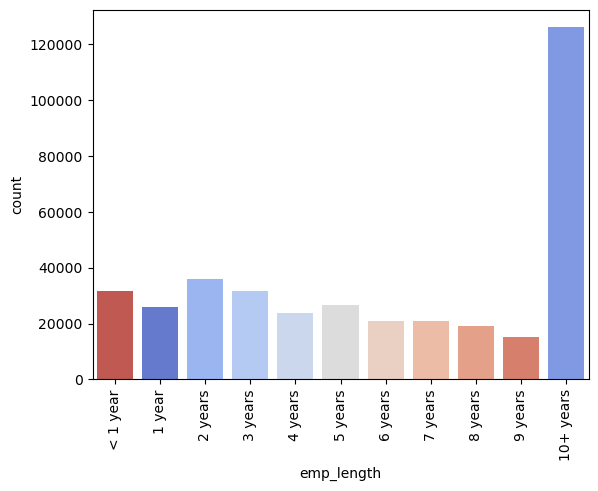

In [151]:
#countplot of the emp_length column

#how to make the plot more readable? The X-axis labels are not readable
#We can rotate the X-axis labels
plt.Figure(figsize=(20,10)) #to increase the size of the plot
sns.countplot(x='emp_length',data=df,order=df_emp_length[0],
              palette='coolwarm',hue = 'emp_length',legend=False)
plt.xticks(rotation=90) #to rotate the X-axis labels
plt.show()

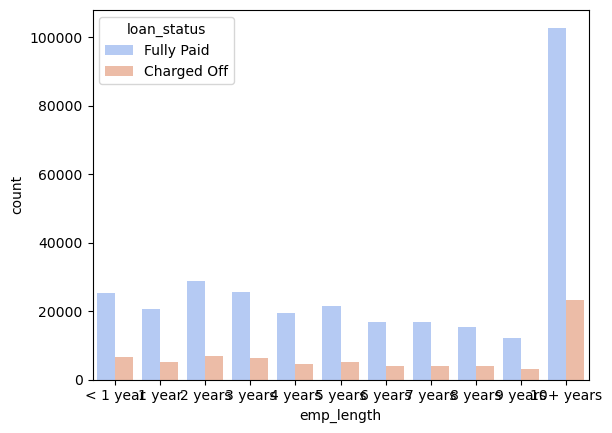

In [154]:
plt.Figure(figsize=(20,10)) #to increase the size of the plot
sns.countplot(x='emp_length',data=df,order=df_emp_length[0],
              palette='coolwarm',hue = 'loan_status')
plt.show()

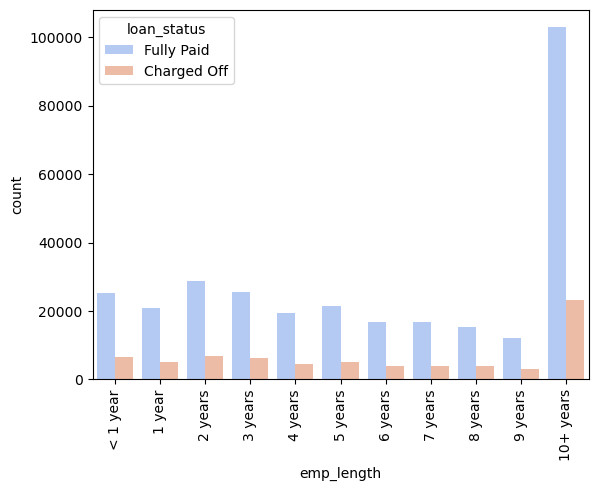

In [ ]:
plt.Figure(figsize=(30,5)) #to increase the size of the plot
sns.countplot(x='emp_length',data=df,order=df_emp_length[0],
              palette='coolwarm',hue = 'loan_status')
plt.xticks(rotation=90) #to rotate the X-axis labels
plt.show()
plt.tight_layout() #for better layout

#What do we observe from the countplot?
#emp_length does not seem to be a good predictor

/var/folders/qx/bz1vynbj5_g5cg431gd5_s7h0000gn/T/ipykernel_59001/1218896560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'].sort_values(ascending=False).plot(kind='bar')


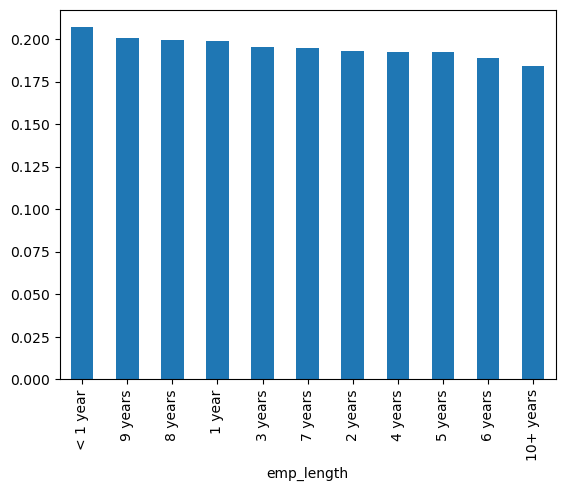

In [162]:
#plotting the proportion of charged off loans of the fully paid ones for each emp_length
df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [167]:
df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'].sort_values(ascending=False)
#observations:
#There is no significant difference in the proportion of charged off loans 
# of the fully paid ones for each emp_length
#So the emp_length column does not seem to be a good predictor
#Lets drop the emp_length column

/var/folders/qx/bz1vynbj5_g5cg431gd5_s7h0000gn/T/ipykernel_59001/3072891735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'].sort_values(ascending=False)


emp_length
< 1 year     0.206872
9 years      0.200470
8 years      0.199760
1 year       0.199135
3 years      0.195231
7 years      0.194774
2 years      0.193262
4 years      0.192385
5 years      0.192187
6 years      0.189194
10+ years    0.184186
Name: Charged Off, dtype: float64

In [ ]:
# To make our conclusion more robust, we can use the chi-square test
# Null Hypothesis: emp_length and loan_repaid are independent
from scipy.stats import chi2_contingency
chi_test1 = chi2_contingency(pd.crosstab(df['loan_repaid'],df['emp_length']))
print('Chi Statistic:',chi_test1[0])
print('P-Value:',chi_test1[1])
print("Is p value < 0.05?:", chi_test1[1] < 0.05)
# p value is less than 0.05, so we reject the null hypothesis
#oops! emp_length and loan_repaid are not independent by the chi-square test
#But visualizing the data, we can see that emp_length is not a good predictor
#So we can drop the emp_length column for parsimony that is simplicity

Chi Statistic: 122.11317384460877
P-Value: 1.8840499520191435e-21
Is p value < 0.05?: True


In [25]:
#dropping the emp_length column
df.drop('emp_length',axis=1,inplace=True)

In [330]:
#revisiting missing values in the data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [178]:
#What is tilte column?
#title is the loan title provided by the borrower
#Lets explore the title column
print('title:',df['title'].unique())

title: ['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' 'Loanforpayoff' 'Toxic Debt Payoff']


In [ ]:
df[['title','purpose']].head(10)
#seems like the title and purpose columns are the same
#can we use Natural Language Processing to verify the similarity between the title and purpose columns?
#Yes, we can use Natural Language Processing to verify the similarity between the title and purpose columns
#We can use the Levenshtein distance to find the similarity between the title and purpose columns
#We can use the fuzzywuzzy library to find the similarity between the title and purpose columns


,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [26]:
title_sim = df[['title','purpose']]

fuzz.ratio from the fuzzywuzzy library calculates the Levenshtein distance between two strings and 
returns a similarity score between 0 and 100. This score represents how similar the two strings are, with 
100 meaning the strings are identical and 0 meaning they are completely different

Levenshtein distance is a way to measure how different two strings are. It's used in linguistics, information theory, and computer science.

In [27]:
title_sim.dropna(inplace=True)
title_sim.isnull().sum()

#removed the Null values to find the similarity between the title and purpose columns

/var/folders/qx/bz1vynbj5_g5cg431gd5_s7h0000gn/T/ipykernel_74642/3055177926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_sim.dropna(inplace=True)


title      0
purpose    0
dtype: int64

In [ ]:
#Lets find the similarity between the title and
#  purpose columns using levenstein distance
#pip install fuzzywuzzy done on terminal
from fuzzywuzzy import fuzz
#now?
#We can use the fuzz.ratio() function to find the similarity between the title and purpose columns
#fuzz.ratio('title','purpose')
#find similarity between the title and purpose columns

title_sim['similarity'] = title_sim.apply(lambda x: fuzz.ratio(x['title'],x['purpose']),axis=1)


#Note: we could also use cosine similarity, may be would try later!


/var/folders/qx/bz1vynbj5_g5cg431gd5_s7h0000gn/T/ipykernel_59001/3816633402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_sim['similarity'] = title_sim.apply(lambda x: fuzz.ratio(x['title'],x['purpose']),axis=1)


In [ ]:
title_sim['similarity'].describe()

#Shows the mean similarity between the title and purpose columns is 65.5, a decent similarity!

count    394274.000000
mean         65.515205
std          27.568582
min           0.000000
25%          52.000000
50%          80.000000
75%          89.000000
max         100.000000
Name: similarity, dtype: float64

In [28]:
#Since purpose column is more descriptive, we can drop the title column
df.drop('title',axis=1,inplace=True)

In [219]:
#The feature mort_acc has missing values = 37795
#mort_acc is the number of mortgage accounts
df.mort_acc.head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [ ]:
len(df.mort_acc.unique())

#It is a continuous variable only

34

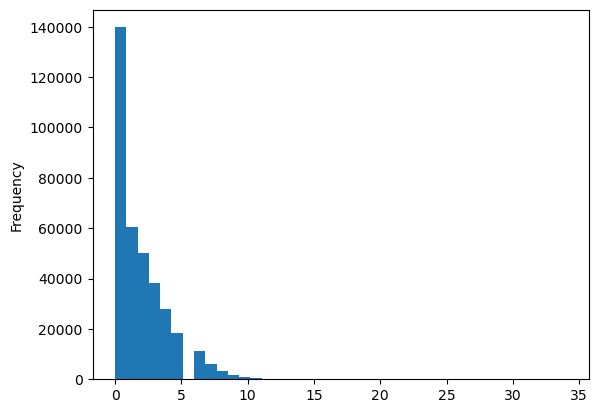

In [ ]:
df.mort_acc.plot(kind='hist',bins=40)
plt.show()
#observations:
#mort_acc is right skewed
#Most of the loans have 0 mortgage accounts
#There are some outliers in the data set
#We cant use mean to fill the missing values as it is right skewed unlike a bell curve

In [ ]:
df.mort_acc.value_counts(normalize=True)*100
#observations:
#Most of the loans have 0 mortgage accounts

mort_acc
0.0     39.018242
1.0     16.864907
2.0     13.942803
3.0     10.621240
4.0      7.784555
5.0      5.078789
6.0      3.089871
7.0      1.689394
8.0      0.871216
9.0      0.462266
10.0     0.241462
11.0     0.133711
12.0     0.073695
13.0     0.040755
14.0     0.029869
15.0     0.017028
16.0     0.010328
17.0     0.006141
18.0     0.005025
19.0     0.004187
20.0     0.003629
24.0     0.002791
22.0     0.001954
21.0     0.001117
25.0     0.001117
27.0     0.000837
32.0     0.000558
31.0     0.000558
23.0     0.000558
26.0     0.000558
28.0     0.000279
30.0     0.000279
34.0     0.000279
Name: proportion, dtype: float64

In [226]:
df.mort_acc.describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [228]:
df.corr(numeric_only=True)['mort_acc'].sort_values(ascending= False).drop('mort_acc')

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [231]:
df.total_acc.head()

#total_acc is the total number of credit lines

0    25.0
1    27.0
2    26.0
3    13.0
4    43.0
Name: total_acc, dtype: float64

In [29]:
mean_mort_acc_per_total_acc = df.groupby('total_acc')['mort_acc'].mean()
print(mean_mort_acc_per_total_acc)


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [233]:
#We can use the mean of the mean mortgage accounts for each total_acc 
# to fill the missing values in the mort_acc column

# We will try this method, however we can also use a machine learning model to fill the missing values
#We can use a model like Random Forest to fill the missing values
#I will do it as a separate analysis later to see if it brings any substantial difference in the results

In [252]:
mean_mort_acc_per_total_acc[6]
#checking how to access the mean mortgage accounts for total_acc = 6

0.15129310344827587

In [30]:
df['mort_acc'] = df.apply(lambda x: mean_mort_acc_per_total_acc[x['total_acc']] if (pd.isnull(x['mort_acc'])) else x['mort_acc'],axis=1)



In [334]:
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
#revol_until has missing values = 156
#pub_rec_bankruptcies has missing values = 535

#revol_util is the revolving line utilization rate
#pub_rec_bankruptcies is the number of public record bankruptcies

In [283]:
df.revol_util.head()

0    41.8
1    53.3
2    92.2
3    21.5
4    69.8
Name: revol_util, dtype: float64

In [284]:
df.pub_rec_bankruptcies.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [285]:
df.pub_rec_bankruptcies.value_counts(normalize=True)
#pub_rec_bankruptcies is a discrete variable

pub_rec_bankruptcies
0.0    0.885928
1.0    0.108194
2.0    0.004670
3.0    0.000887
4.0    0.000207
5.0    0.000081
6.0    0.000018
7.0    0.000010
8.0    0.000005
Name: proportion, dtype: float64

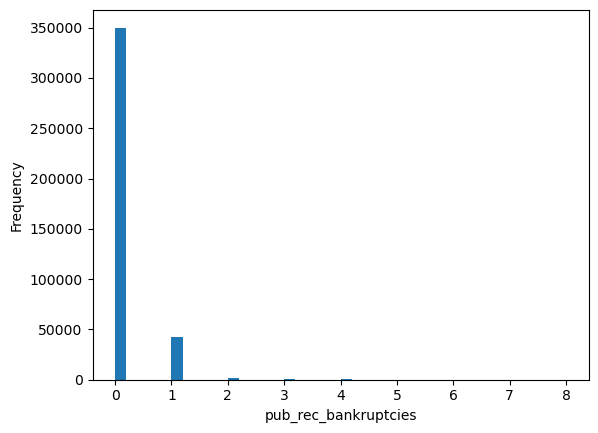

In [ ]:

df.pub_rec_bankruptcies.plot(kind='hist',bins=40)
plt.xlabel('pub_rec_bankruptcies')
plt.show()

#shows no continuous variable here
#pub_rec_bankruptcies is an ordinal categorical variable

In [31]:
#since the null values in pub_rec_bankruptcies are 
# less than 0.1% of the data, we can drop the rows with null values
#same applies to revol_util

df.dropna(inplace=True)

In [32]:
df.isnull().sum()

#We have removed the missing values from the data set!

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [288]:
#Lets have a relook at the data set
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Step 3 : Dealing with Categorical/Discrete Variables

In [ ]:

#So we have dealt with the missing data
#Now we can move on to the next step
#The next step is to convert the categorical variables to dummy variables


In [291]:
#Lets start with public record bankruptcies itself

df.pub_rec_bankruptcies.unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [318]:
df.pub_rec_bankruptcies.dtype

dtype('float64')

Label Encoding:

Assigns each unique category a different integer.
Suitable for ordinal categorical variables.

In [33]:
#We can convert the pub_rec_bankruptcies column to a categorical column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['pub_rec_bankruptcies_cat'] = le.fit_transform(df['pub_rec_bankruptcies'])

In [338]:
df.pub_rec_bankruptcies_cat.dtype

dtype('int64')

In [321]:
df.pub_rec_bankruptcies_cat.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [169]:
#drop the pub_rec_bankruptcies column
df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [34]:
#lets drop the loan_status column now
df.drop('loan_status',axis=1,inplace=True)

In [35]:
#Lets first enlist the non-numeric columns
df.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [340]:
#lets have a look at the term column
print('term column is:\n',df.term)
print('Unique Values:',df.term.unique())
print(feature_info('term'))
#term is an ordinal categorical variable as the categories have an order

term column is:
 0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object
Unique Values: [' 36 months' ' 60 months']
The number of payments on the loan. Values are in months and can be either 36 or 60.
None


In [ ]:
#Convert the term column to either 36 or 60 integer values using the map function
unique_values = df.term.unique()
check = df['term'].map({unique_values[0]:36,unique_values[1]:60})
print(check)



0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64


In [347]:
#use apply function instead of map function
#check2 = df['term'].apply(lambda x: int(x[:3]))
check2 = df['term'].apply(lambda x: int(x.split()[0]))
print(check2)
#i found apply function more readable and easier to use

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64


In [36]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [37]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [38]:
#There is no numerical significance of 36 or 60, so we can convert the term column to dummy variables 
# by using the get_dummies function that is available in the pandas library
# need 0 for False and 1 for True
#We can use the drop_first parameter to drop the first column
#  to avoid multicollinearity
#pd.get_dummies(df['term'],drop_first=True,prefix='term',prefix_sep='_',dtype = int)
#Lets do it for the term column
term_60 = pd.get_dummies(df['term'],drop_first=True,dtype = int,prefix='term',prefix_sep='_')
#Lets concatenate the term_dummies to the data set  
df = pd.concat([df,term_60],axis=1)


In [39]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,pub_rec_bankruptcies_cat,term_60
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,0
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,1


In [350]:
#dealing with grade and sub_grade now
df[['grade','sub_grade']].head()

#grade is a part of sub_grade and sub_grade is more detailed. Hence dropping grade.


,grade,sub_grade
0,B,B4
1,B,B5
2,B,B3
3,A,A2
4,C,C5


In [40]:
df.drop('grade',axis=1,inplace = True)

#dropped the grade column

In [ ]:
#lets explore the unique values of sub_grade
print(df.sub_grade.unique())
print(len(df.sub_grade.unique()))

#There are 35 unique values in the sub_grade column
#There will be 35-1 = 34 dummy variables for the sub_grade column
#Is sub_grade even worthed?
#How to know whether sub_grade is worthed or not?
#We can use the chi-square test to know whether sub_grade is worthed or not
#We can use the chi2_contingency function that is available in the scipy library
#We can use the chi2_contingency function to find the p-value
#We can use the p-value to know whether the sub_grade column is worthed or not


['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
35


In [386]:
df[['sub_grade','loan_repaid']].head()

,sub_grade,loan_repaid
0,B4,1
1,B5,1
2,B3,1
3,A2,1
4,C5,0


In [46]:
#lets perform a chi square test to know whether loan_repaid is independent of sub_grade
#Null Hypothesis: loan_repaid is independent of sub_grade
#Alternate Hypothesis: loan_repaid is not independent of sub_grade
#We can use the chi2_contingency function to perform the chi square test
from scipy.stats import chi2_contingency
chi_test = chi2_contingency(pd.crosstab(df['loan_repaid'],df['sub_grade']))
print('Chi Stat: {}'.format(chi_test.statistic))
print('P-Value: {}'.format(chi_test.pvalue))
#P-value is less than 0.05, so we reject the null hypothesis
#Hence loan_repaid is not independent of sub_grade
#Inituitively too, a banker would consider the sub_grade of the borrower before lending the loan!


Chi Stat: 27509.058231525418
P-Value: 0.0


In [47]:
chi_test.expected_freq

array([[ 1906.00905068,  1871.09399346,  2066.85369631,  3091.94408417,
         3628.81212695,  3754.34941134,  4404.9856181 ,  5219.80105461,
         5013.25299138,  4324.36714328,  4630.95273001,  4421.46238668,
         4154.10720132,  3968.54740283,  3572.90880499,  3128.03605343,
         2729.65132749,  2392.26987569,  2280.26707977,  1898.75142642,
         1550.77776625,  1453.48637085,  1215.35783452,  1050.19784474,
          894.6493033 ,   692.41658422,   540.59493091,   446.63811962,
          349.54287623,   273.63204957,   207.33267125,   147.50630916,
          108.27590779,    72.77239455,    61.39557815],
       [ 7810.99094932,  7667.90600654,  8470.14630369, 12671.05591583,
        14871.18787305, 15385.65058866, 18052.0143819 , 21391.19894539,
        20544.74700862, 17721.63285672, 18978.04726999, 18119.53761332,
        17023.89279868, 16263.45259717, 14642.09119501, 12818.96394657,
        11186.34867251,  9803.73012431,  9344.73292023,  7781.24857358,
       

In [ ]:
# Convert the expected frequencies to a DataFrame
expected_freq_df = pd.DataFrame(chi_test.expected_freq, columns=df['sub_grade'].unique())


print(expected_freq_df)

#Just doing to see how it looks like!

            B4           B5           B3            A2            C5  \
0  1906.009051  1871.093993  2066.853696   3091.944084   3628.812127   
1  7810.990949  7667.906007  8470.146304  12671.055916  14871.187873   

             C3            A1            B2            C1            A5  ...  \
0   3754.349411   4404.985618   5219.801055   5013.252991   4324.367143  ...   
1  15385.650589  18052.014382  21391.198945  20544.747009  17721.632857  ...   

            G1           F5          G2           C4          F1          F3  \
0   692.416584   540.594931   446.63812   349.542876   273.63205  207.332671   
1  2837.583416  2215.405069  1830.36188  1432.457124  1121.36795  849.667329   

           G5          G4          F2          G3  
0  147.506309  108.275908   72.772395   61.395578  
1  604.493691  443.724092  298.227605  251.604422  

[2 rows x 35 columns]


In [42]:
#So converting the sub_grade column to dummy variables by get_dummies function
dummies_sub_grade = pd.get_dummies(df['sub_grade'],drop_first=True,dtype = int,prefix='sub_grade',prefix_sep='_')
#drop_first is True to avoid multicollinearity by dropping the first column
#lets concatenate the sub_grade dummies to the data set
df = pd.concat([df,dummies_sub_grade],axis = 1)

In [55]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

#Drop the subgrade column
df.drop('sub_grade',axis=1,inplace=True)


In [170]:
df.columns



Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'loan_repaid', 'pub_rec_bankruptcies_cat',
       'term_60', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'init

In [61]:
#Need to enumerate the objects in the data set
df.select_dtypes(include = 'object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [63]:
df.select_dtypes(include = 'object').head()

,home_ownership,verification_status,issue_d,purpose,earliest_cr_line,initial_list_status,application_type,address
0,RENT,Not Verified,Jan-2015,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Not Verified,Jan-2015,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Source Verified,Jan-2015,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Not Verified,Nov-2014,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Verified,Apr-2013,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [64]:
#convert verification_status, application_type, initial_list_status, purpose to dummy variables 
# by using the get_dummies function
#verification_status is the income verification status
#application_type is the application type
#initial_list_status is the initial listing status
#purpose is the purpose of the loan


In [ ]:
#for verification_status
df['verification_status'].unique()
#verification_status is a categorical variable

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [69]:
verification_status_dummies = pd.get_dummies(df['verification_status'],drop_first = True,dtype = int,
                       prefix='verification_status',prefix_sep='_')
#lets concatenate the verification_status dummies to the data set
df = pd.concat([df,verification_status_dummies],axis = 1)

In [70]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,...,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,vacation,26.24,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,credit_card,12.79,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df.drop('verification_status',axis=1,inplace=True)

In [72]:
#Look at application_type
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [73]:
application_type_dummies = pd.get_dummies(df['application_type'],drop_first = True,dtype = int,
                          prefix='application_type',prefix_sep='_')
df = pd.concat([df,application_type_dummies],axis=1)
df.drop('application_type',axis=1,inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,purpose,dti,earliest_cr_line,...,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,vacation,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,debt_consolidation,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,credit_card,12.79,Aug-2007,...,0,0,0,0,0,0,1,0,1,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,credit_card,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,credit_card,33.95,Mar-1999,...,0,0,0,0,0,0,0,1,1,0


In [74]:
#for initial_list_status
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [76]:
initial_list_dummies = pd.get_dummies(df['initial_list_status'], drop_first = True, dtype = int, 
                                      prefix='initial_list_status',prefix_sep='_')
df = pd.concat([df,initial_list_dummies],axis = 1)
df.drop('initial_list_status',axis=1,inplace=True)

In [77]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,purpose,dti,earliest_cr_line,...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,vacation,26.24,Jun-1990,...,0,0,0,0,0,0,0,1,0,1
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,debt_consolidation,22.05,Jul-2004,...,0,0,0,0,0,0,0,1,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,credit_card,12.79,Aug-2007,...,0,0,0,0,0,1,0,1,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,credit_card,2.60,Sep-2006,...,0,0,0,0,0,0,0,1,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,credit_card,33.95,Mar-1999,...,0,0,0,0,0,0,1,1,0,0


In [78]:
#for purpose

df.purpose.unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [80]:
df.groupby('purpose')['loan_repaid'].value_counts(normalize=True).unstack()

loan_repaid,0,1
purpose,,
car,0.134475,0.865525
credit_card,0.167191,0.832809
debt_consolidation,0.207427,0.792573
educational,0.162602,0.837398
home_improvement,0.170110,0.829890
house,0.197542,0.802458
major_purchase,0.164687,0.835313
medical,0.217246,0.782754
moving,0.234694,0.765306


In [ ]:
#chi square test to know whether loan_repaid is independent of purpose
#Null Hypothesis: loan_repaid is independent of purpose
chi_test_purpose = chi2_contingency(pd.crosstab(df['loan_repaid'],df['purpose']))
chi2_statistic, p_value, dof, expected = chi_test_purpose
print(f"Chi2 Statistic: {chi2_statistic}, p-value: {p_value}, Degrees of Freedom: {dof}")
print('P value < 0.05',p_value < 0.05)

#p value is less than 0.05, so we reject the null hypothesis

Chi2 Statistic: 1388.6367799922289, p-value: 4.306819549905697e-289, Degrees of Freedom: 13
P value < 0.05 True


In [84]:
purpose_dummies = pd.get_dummies(df['purpose'],drop_first = True, dtype = int,prefix='purpose',prefix_sep='_')
df = pd.concat([df,purpose_dummies],axis = 1)

In [85]:
df.drop('purpose',axis=1,inplace=True)

In [86]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,dti,earliest_cr_line,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,26.24,Jun-1990,16.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#Lets have a look at the home_ownership column
df.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [ ]:
df.home_ownership.value_counts(normalize=True)

#observations:
#very less loans are from other, none, any
#so we club them together


home_ownership
MORTGAGE    0.501044
RENT        0.403308
OWN         0.095289
OTHER       0.000278
NONE        0.000073
ANY         0.000008
Name: proportion, dtype: float64

In [ ]:
df['home_ownership'] = df['home_ownership'].apply(lambda x:'OTHER_NONE_ANY' 
                                   if x in ['OTHER','NONE','ANY'] else x)
df['home_ownership'].unique()
#Succesfully clubbed the other, none, any categories

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER_NONE_ANY'], dtype=object)

In [93]:
#Convert the home_ownership column to dummy variables
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first = True, dtype = int,
                        prefix='home_ownership',prefix_sep='_')
df = pd.concat([df,home_ownership_dummies],axis =1)
df.drop('home_ownership', axis = 1, inplace = True)

In [94]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_OTHER_NONE_ANY,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#Lets work on address column now
df['address'].head()
#Which one is the zip code?
#The zip code is the last 5 digits of the address column
#We can extract the zip code from the address column
df['zip_code'] = df['address'].apply(lambda x: x.split()[-1])
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [100]:
#Drop address column
df.drop('address',axis=1,inplace=True)

In [ ]:
#check out on zip_code column
df['zip_code'].unique()

#zip_code is a categorical variable, can be converted to dummy variables

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [104]:
zip_code_dummies = pd.get_dummies(df['zip_code'],drop_first = True, dtype = int,
                                  prefix = 'Zip_code',prefix_sep='_')
df = pd.concat([df,zip_code_dummies],axis = 1)

In [108]:
#drop zip_code column
df.drop('zip_code',axis=1,inplace=True)

In [106]:
#now look into issue_d column
#what is issue_d
#issue_d is the month in which the loan was funded
#While issue_d is an important column, because, we can know the time period of the loan 
# and the loan status. Longer the time period, more the chances of defaulting the loan
#But the issue_d column wont be available to us to predict the loan status in future
#We have to decide whether to give loan to a borrower or not based on these features, and
#the issue_d column wont be available to us in the future
#Hence, drop the issue_d column

df.drop('issue_d',axis=1,inplace=True)


In [ ]:
#Its so tiring, lets look into the object columns again

df.select_dtypes(include = 'object').columns

#only earliest_cr_line is left

Index(['earliest_cr_line'], dtype='object')

In [ ]:
#lets look into the earliest_cr_line column
print(df.earliest_cr_line.head())
print(feature_info('earliest_cr_line'))
#earliest_cr_line shall be available to us in the future to predict the loan status
#it is a time stamp feature

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object
The month the borrower's earliest reported credit line was opened
None


In [123]:
#lets extract the year from the earliest_cr_line column
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

In [129]:
#Converting the  date year into 
# the number of years since the earliest_cr_line was issued

In [127]:
df['earliest_cr_line'] = 2025 - df['earliest_cr_line']

In [ ]:
df['earliest_cr_line'].head()
#earliest_cr

0    35
1    21
2    18
3    19
4    26
Name: earliest_cr_line, dtype: int64

In [ ]:
len(df['earliest_cr_line'].unique())
#earliest_cr_line is a continuous variable

65

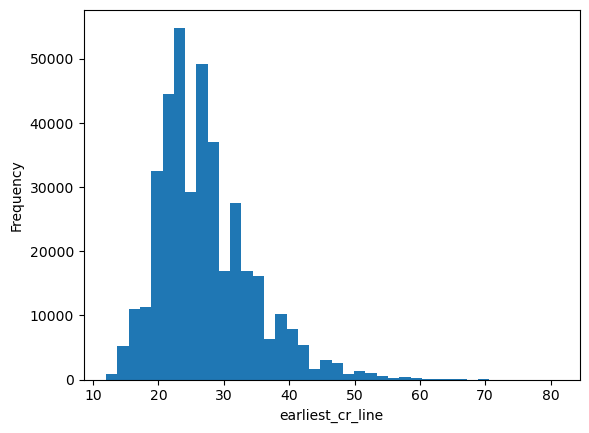

In [ ]:
df['earliest_cr_line'].plot(kind='hist',bins=40)
plt.xlabel('earliest_cr_line')
plt.show()
#the histogram shows that earliest_cr_line is right skewed and continuous

In [130]:
df.select_dtypes(include = 'object').columns


Index([], dtype='object')

In [131]:
#Finally have a look at the dataset
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,home_ownership_RENT,Zip_code_05113,Zip_code_11650,Zip_code_22690,Zip_code_29597,Zip_code_30723,Zip_code_48052,Zip_code_70466,Zip_code_86630,Zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,26.24,35,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,21,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,18,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,19,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,26,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
#Okay, so data has been preprocessesd successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc         

Step 4: Train Test Split

In [141]:
from sklearn.model_selection import train_test_split

In [188]:
#Setting X and y for features and labels respectively
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [189]:
df.shape

(395219, 80)

In [190]:
df.drop('loan_repaid',axis=1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies_cat', 'term_60',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
  

In [147]:
# Verify if I am using a GPU or not to speed up the process
import tensorflow as tf

# Check if TensorFlow can access a GPU
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is not available


In [ ]:
#How to check RAM of my computer?
#We can check the RAM of the computer by using the psutil library
#We can use the virtual_memory() function to check the RAM of the computer
import psutil
print('RAM:',psutil.virtual_memory())

#is this RAM high enough to run the model?
#Yes, this RAM is high enough to run the model





RAM: svmem(total=8589934592, available=1392918528, percent=83.8, used=3063857152, free=52953088, active=1355939840, inactive=1331609600, wired=1707917312)


In [150]:
#if the RAM too was not high enough, what could I do?
#I would have grabbed a fraction of the data by .sample() function
#I would have used the fraction of the data to train and test the model

df_sample = df.sample(frac= 0.1,random_state = 101)

In [ ]:
(len(df_sample)/len(df))*100

#we got 10% of the data here.

#Nevertheless, lets try the model on the whole data set first

10.000025302427263

In [191]:
#Splitting the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                 random_state = 101)


In [192]:
#Normalizing the data using MinMaxScaler which scales the data between 0 and 1 by 
# using the formula (x - min)/(max - min) and is less sensitive to outliers

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [193]:
X_train = scaler.fit_transform(X_train) #fit_transform on training data set does 
#the fit and transform both that is it fits the data and transforms the data
#fitting data means finding the min and max values of the data
#transforming data means scaling the data between 0 and 1

In [194]:
pd.DataFrame(X_train).head()
#What are the number of features in the data set?
#The number of features in the data set is 78. How?
#We have 78 columns in the data set. No. 


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.223077,0.0,0.465524,0.216171,0.003446,0.001800,0.101449,0.120000,0.000000,0.005595,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.487179,0.0,0.324503,0.436140,0.006317,0.002165,0.144928,0.146667,0.000000,0.009834,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.316667,1.0,0.465524,0.207313,0.006317,0.002053,0.144928,0.093333,0.000000,0.010893,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.076923,0.0,0.149981,0.071106,0.007466,0.001638,0.246377,0.080000,0.011628,0.002543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.487179,0.0,0.139462,0.406357,0.026417,0.000932,0.188406,0.146667,0.000000,0.024133,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
X_test = scaler.transform(X_test) #transform on testing data set does only the 
#transform because it uses the min and max values from the training data
#We dont fit the testing data because we dont want to leak the information of
# the testing data to the training model

In [245]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.353846,0.0,0.513050,0.342708,0.012007,0.001312,0.304348,0.120000,0.0,0.012185,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.769231,1.0,0.477211,0.502067,0.014012,0.002746,0.246377,0.253333,0.0,0.021191,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.538462,1.0,0.100117,0.280764,0.008201,0.002129,0.144928,0.106667,0.0,0.002990,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.487179,0.0,0.212700,0.418002,0.011486,0.001786,0.275362,0.173333,0.0,0.006390,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.451923,1.0,0.477211,0.296405,0.004767,0.001880,0.289855,0.253333,0.0,0.016047,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Step 5: Building Model

The Input Layer


With respect to the number of neurons comprising this layer, this parameter is completely and uniquely determined once you know the shape of your training data. Specifically, the number of neurons comprising that layer is equal to the number of features (columns) in your data. Some NN configurations add one additional node for a bias term.

The Output Layer

Like the Input layer, every NN has exactly one output layer. Determining its size (number of neurons) is simple; it is completely determined by the chosen model configuration.

Is your NN going to run in Machine Mode or Regression Mode (the ML convention of using a term that is also used in statistics but assigning a different meaning to it is very confusing)? Machine mode: returns a class label (e.g., "Premium Account"/"Basic Account"). Regression Mode returns a value (e.g., price).

If the NN is a regressor, then the output layer has a single node.

If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.

The Hidden Layers

How many hidden layers? Well, if your data is linearly separable (which you often know by the time you begin coding a NN), then you don't need any hidden layers at all. Of course, you don't need an NN to resolve your data either, but it will still do the job.
Start Simple: For many problems, starting with one or two hidden layers works well. For example, you can achieve over 97% accuracy on the MNIST dataset with just one hidden layer of a few hundred neurons, and over 98% accuracy with two hidden layers, in roughly the same amount of training time.
If data is less complex and is having fewer dimensions or features then neural networks with 1 to 2 hidden layers would work. If data is having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used

There are many rule-of-thumb methods for determining an acceptable number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The number of hidden neurons should be less than twice the size of the input layer.

(https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [246]:
#Building the model now by using the Sequential model from the keras library
#sequential model is a linear stack of layers which is used to build the model 
# layer by layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
#Dense layer is a fully connected layer which means 
# each neuron in the layer is connected to each neuron in the next layer
# Dropout layer is used to prevent overfitting by randomly setting the 
# output of some neurons to zero during training
# Now we will add layers to the model
model = Sequential()
#Adding the input layer
model.add(Dense(79,activation = 'relu'))
model.add(Dropout(0.5)) #to prevent overfitting by setting 50% of the neurons to zero
#How many hidden layers should i add?
#We can add 2 hidden layers as a rule of thumb
#Adding the first hidden layer
#No of neurons in first layer = (no of input features + no of output features)/2 that is
#  (79+1)/2 = 40
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5)) #to prevent overfitting by setting 50% of the neurons to zero
#Adding the second hidden layer
#No of neurons in second layer = (no of input features + no of output features)/2 
# that is (40+1)/2 = 20
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5)) #to prevent overfitting by setting 50% of the neurons to zero
#Adding the output layer
model.add(Dense(1,activation='sigmoid'))

#Why use activation as relu in the hidden layers?
#What is relu?
#Relu is the rectified linear unit activation function
#Relu is used in the hidden layers because it is computationally less expensive
#why use sigmoid in the output layer?
#What is sigmoid?
#Sigmoid is the activation function that is used in the output 
# layer for binary classification
#Sigmoid is used in the output layer because it gives the probability
# of the output being 1
#It maps the output to a value between 0 and 1, making it useful for binary tasks


In [247]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#adam is the optimizer that is used to optimize the weights of the model because
# it is computationally efficient and requires less memory
#binary_crossentropy is the loss function that is used for binary classification
#It is used to calculate the error between the predicted values and the actual values

In [248]:
#fitting the model now
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))
#epochs is the number of times the model goes through the training data
#batch_size is the number of samples that are used in each iteration
#validation_data is the data that is used to validate the model after each epoch


Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4121 - val_loss: 0.2671
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2775 - val_loss: 0.2646
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2698 - val_loss: 0.2636
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2668 - val_loss: 0.2646
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2652 - val_loss: 0.2636
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2660 - val_loss: 0.2637
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2639 - val_loss: 0.2631
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2647 - val_loss: 0.2633
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2639 - val_loss: 0.2628
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2650 - val_loss: 0.2629
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2616 - val_loss: 0.2622
Epoch 12/25
1236/1236 ━━━━━━━━

In [249]:
#Lets save this model
model.save('loan_repayment_model_Neural.keras')



In [250]:
#Lets load the model
from tensorflow.keras.models import load_model


model_saved = load_model('loan_repayment_model_Neural.keras')

Step 6: Model Evaluation

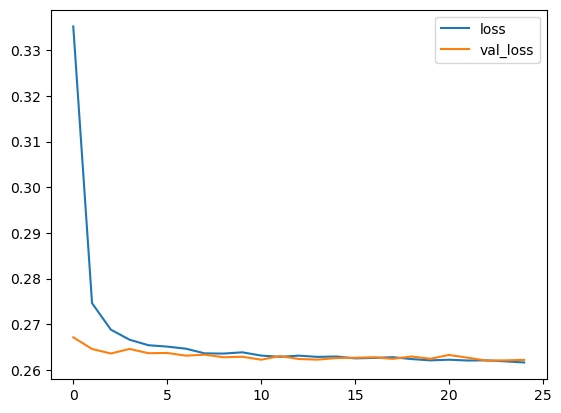

In [ ]:
#plotting the training loss versus validation loss
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()
#The training loss is decreasing and the validation loss is also decreasing
#This shows that the model is not overfitting
#The model is generalizing well to the validation data





#Lets try using the early stopping callback to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
#early stopping callback is used to stop the training of the model when the validation loss 
#stops improving, to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           patience=25, verbose=1, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=600, batch_size=256, callbacks=[early_stop])


In [ ]:
#Since model fits well, let's predict the loan repayment status from X_test
predictions = model.predict(X_test)
#predictions is the probability of the loan being repaid

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 244us/step


In [255]:
loan_repayment_distribution = df.loan_repaid.value_counts(normalize=True)
print(loan_repayment_distribution)

loan_repaid
1    0.803848
0    0.196152
Name: proportion, dtype: float64


In [256]:
# Since the loan_repaid = 1 is 0.8, we can set a threshold of 0.5 (at least)
#  to predict the loan repayment status
threshold = 0.5
predict_classes = (predictions > threshold).astype(int)
print(predict_classes)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [258]:
#Now use Confusion matrix and classication reports
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_classes))
print('Classification Report: \n',classification_report(y_test,predict_classes))

Confusion Matrix: 
 [[ 6722  8936]
 [    2 63384]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [259]:
#How to interpret confusion matrix?
#The confusion matrix shows the number of true positives, true negatives,
# false positives, and false negatives
#Where are false positives and false negatives?
#False positives are the loans that are predicted to be repaid 
# but are actually not repaid
#False negatives are the loans that are predicted to be not repaid 
# but are actually repaid

#            Predicted	        Predicted
#Actual	True Positive (TP)	False Negative (FN)
#Actual	False Positive (FP)	True Negative (TN)

Task : Would we give loan to a person who has applied for it?

In [260]:
import random
random.seed(101)
random_ind = random.randint(0,len(df)-1)
new_customer = df.drop('loan_repaid',axis = 1).iloc[random_ind]
print(new_customer)


loan_amnt         25000.00
term                 60.00
int_rate             18.24
installment         638.11
annual_inc        61665.00
                    ...   
Zip_code_30723        1.00
Zip_code_48052        0.00
Zip_code_70466        0.00
Zip_code_86630        0.00
Zip_code_93700        0.00
Name: 305323, Length: 79, dtype: float64


In [263]:
new_customer = scaler.transform(new_customer.values.reshape(1, 79))
prediction = model.predict(new_customer)
predicted_class = (prediction > 0.5).astype(int)
print("Prediction for the new customer: ", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction for the new customer:  [[1]]


In [264]:
actual_status = df['loan_repaid'].iloc[random_ind]
print("Actual Status: ", actual_status)

Actual Status:  1


In [ ]:
#The model predicts the loan repayment status of the new customer as 1
#The actual loan repayment status of the new customer is 1
#The model has predicted the loan repayment status of the new customer correctly
#Congratulations to myself for building the model successfully!

In [283]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,home_ownership_RENT,Zip_code_05113,Zip_code_11650,Zip_code_22690,Zip_code_29597,Zip_code_30723,Zip_code_48052,Zip_code_70466,Zip_code_86630,Zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,26.24,35,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,21,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,18,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,19,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,26,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [284]:
# As considered earlier, we can use Principal Component Analysis 
# to reduce the number of features

#Lets try to reduce the number of features using Principal Component Analysis

#First we have to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('loan_repaid',axis=1))
#fit_transform on the data set does the fit and transform both that is it fits the data and transforms the data
#fitting data means finding the mean and standard deviation of the data
#transforming data means scaling the data to have a mean of 0 and a standard
# deviation of 1

In [288]:
X_scaled

array([[-0.49324391, -0.55851889, -0.49231481, ..., -0.41001879,
        -0.16887792, -0.17019678],
       [-0.73256297, -0.55851889, -0.36935315, ..., -0.41001879,
        -0.16887792, -0.17019678],
       [ 0.17684946, -0.55851889, -0.70470314, ..., -0.41001879,
        -0.16887792, -0.17019678],
       ...,
       [-1.09154156, -0.55851889, -0.81648647, ...,  2.4389126 ,
        -0.16887792, -0.17019678],
       [ 0.82301092,  1.79044972,  0.37288817, ..., -0.41001879,
        -0.16887792, -0.17019678],
       [-1.45052015, -0.55851889, -0.00717515, ..., -0.41001879,
        -0.16887792, -0.17019678]])

In [289]:
# As considered earlier, we can use Principal Component Analysis 
# to reduce the number of features

#Lets try to reduce the number of features using Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components is the number of components to keep
X_pca = pca.fit_transform(X_scaled)



In [290]:
X_pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2'])
print(X_pca_df.head())

        PC1       PC2
0 -1.345234 -0.706144
1 -0.928422 -0.802065
2 -1.383574 -0.216705
3 -3.404680 -0.529738
4  3.168320  0.697393


In [ ]:
print("Shape of PCA transformed data:", X_pca.shape)
print('Explained Variance Ratio:',pca.explained_variance_ratio_)
print('Sum of Explained Variance Ratio:',sum(pca.explained_variance_ratio_)*100)

#Only 2 components could explain 8.26% of the variance in the data set
#This is very less
#We can try to increase the number of components to explain more variance in the data set

Shape of PCA transformed data: (395219, 2)
Explained Variance Ratio: [0.04729711 0.03537817]
Sum of Explained Variance Ratio: 8.267527915030907


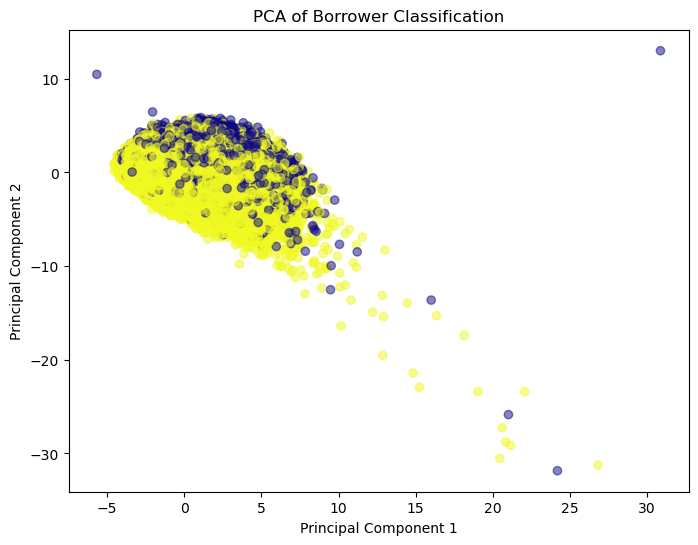

In [ ]:
#Lets do a scatter plot of the PCA transformed data to see the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=df['loan_repaid'], cmap='plasma',alpha=0.5)
plt.title('PCA of Borrower Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

#The PCA transformed data shows that the data is not linearly separable clearly
#The data points are not forming distinct clusters
#The data points are overlapping
#Should we still go ahead with the PCA transformed data?
#We can still go ahead with the PCA transformed data
#We can use the PCA transformed data to train the model
#We can use the PCA transformed data to predict the loan repayment status



Forming Model by PCA Components

In [296]:
#Separating data
X_pca_train,X_pca_test,y_train,y_test = train_test_split(X_pca,df['loan_repaid'],
                                                          test_size=0.2,random_state=101)

In [297]:
#scaling the X_pca_train and X_pca_test data
scaler_pca = MinMaxScaler()

In [298]:
X_pca_train = scaler_pca.fit_transform(X_pca_train)
X_pca_test = scaler_pca.transform(X_pca_test)

In [299]:
#Building model on PCA transformed data
model_pca = Sequential()
model_pca.add(Dense(2, activation='relu'))#2 neurons in the input layer
model_pca.add(Dense(2, activation='relu'))#2 neurons in the hidden layer
model_pca.add(Dense(1, activation='sigmoid'))#1 neuron in the output layer
model_pca.compile(optimizer='adam', loss='binary_crossentropy')
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           patience=25, verbose=1, restore_best_weights=True)
model_pca.fit(x=X_pca_train, y=y_train, epochs=600, batch_size=256, 
               validation_data=(X_pca_test, y_test), callbacks=[early_stop])


Epoch 1/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - loss: 0.5694 - val_loss: 0.5013
Epoch 2/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - loss: 0.4987 - val_loss: 0.4981
Epoch 3/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - loss: 0.4940 - val_loss: 0.4935
Epoch 4/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - loss: 0.4864 - val_loss: 0.4845
Epoch 5/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 0.4771 - val_loss: 0.4667
Epoch 6/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - loss: 0.4598 - val_loss: 0.4562
Epoch 7/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4515 - val_loss: 0.4514
Epoch 8/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - loss: 0.4473 - val_loss: 0.4496
Epoch 9/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - loss: 0.4455 - val_loss: 0.4499
Epoch 10/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - loss: 0.4445 - val_loss: 0.4494
Epoch 11/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 0.4460 - val_loss: 0.4491

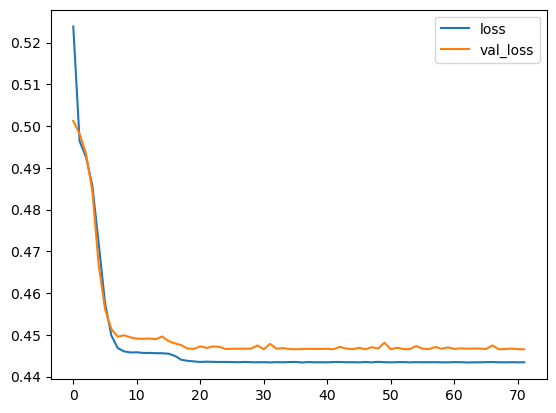

In [ ]:
#Plot the losses
losses_pca = pd.DataFrame(model_pca.history.history)
losses_pca.plot()
plt.show()
#observations:
#The training loss is decreasing and the validation loss is also decreasing
#This shows that the model is not overfitting



In [301]:
print(losses_pca)

        loss  val_loss
0   0.523864  0.501268
1   0.496336  0.498086
2   0.492652  0.493476
3   0.485816  0.484543
4   0.471969  0.466744
..       ...       ...
67  0.443446  0.446561
68  0.443437  0.446622
69  0.443468  0.446730
70  0.443435  0.446600
71  0.443443  0.446558

[72 rows x 2 columns]


In [302]:
#Lets make predictions
predictions_pca = model_pca.predict(X_pca_test)
predict_classes_pca = (predictions_pca > 0.5).astype(int)


2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 236us/step


In [ ]:
#Classification report and confusion matrix
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_classes_pca))
print('Classification Report: \n',classification_report(y_test,predict_classes_pca))

#The model has an accuracy of 0.80
#Confusion matrix shows that there is missclassification and 
# it is better to use the original data
#probably due to the loss of information in the PCA transformed data
#or because data was not linearly separable
#Could we do hyperparameter tuning?
#Yes, we can do hyperparameter tuning
#We can use the GridSearchCV function that is available in the sklearn library
#We can use the GridSearchCV function to find the best hyperparameters
#We can use the best hyperparameters to train the model



Confusion Matrix: 
 [[ 1190 14468]
 [  846 62540]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.08      0.13     15658
           1       0.81      0.99      0.89     63386

    accuracy                           0.81     79044
   macro avg       0.70      0.53      0.51     79044
weighted avg       0.77      0.81      0.74     79044



In [304]:
#We try to improve on the principal component analysis model

from sklearn.decomposition import PCA
pca = PCA(n_components=3) # n_components is the number of components to keep
X_pca = pca.fit_transform(X_scaled)


In [305]:
X_pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3'])
print(X_pca_df.head())

        PC1       PC2       PC3
0 -1.345234 -0.706144 -0.146854
1 -0.928422 -0.802065 -0.047858
2 -1.383574 -0.216705 -1.706398
3 -3.404680 -0.529738 -1.210954
4  3.168320  0.697393 -0.566875


In [ ]:
print("Shape of PCA transformed data:", X_pca.shape)
print('Explained Variance Ratio:',pca.explained_variance_ratio_)
print('Sum of Explained Variance Ratio:',sum(pca.explained_variance_ratio_)*100)
#only 3 components could explain 10.65% of the variance in the data set

Shape of PCA transformed data: (395219, 3)
Explained Variance Ratio: [0.04729711 0.03537817 0.02382612]
Sum of Explained Variance Ratio: 10.65013959283084


In [308]:
#Lets find the explained_variace_ratio from n_components =2 to n_components = 79
total_explained_variance_ratio = []
for i in range(2,80):  #n_components = 2 to 79
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    total_explained_variance_ratio.append(sum(pca.explained_variance_ratio_)*100)
print(pd.DataFrame({'n_components':range(2,80),'Total Explained Variance Ratio':total_explained_variance_ratio}))


    n_components  Total Explained Variance Ratio
0              2                        8.267528
1              3                       10.650140
2              4                       12.914700
3              5                       15.064490
4              6                       17.096770
..           ...                             ...
73            75                       99.955476
74            76                       99.980396
75            77                       99.991462
76            78                      100.000000
77            79                      100.000000

[78 rows x 2 columns]


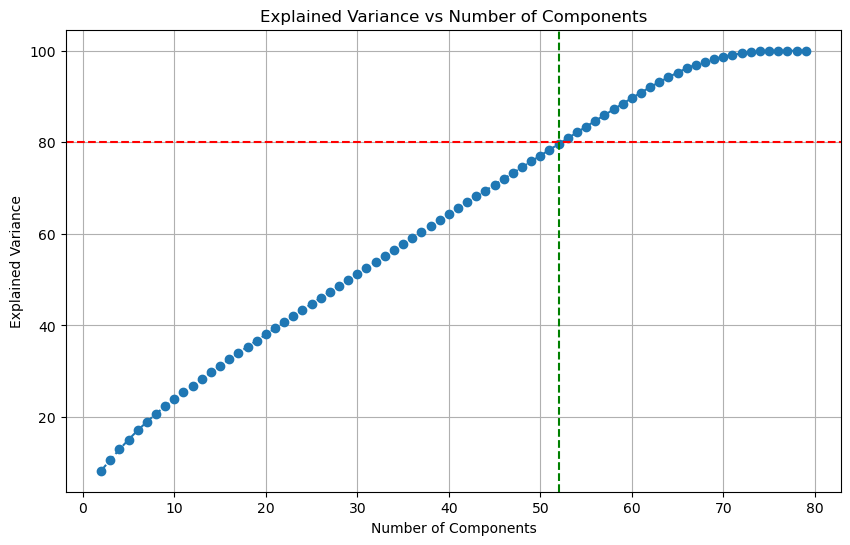

In [ ]:
#Lets do an elbow plot to find the number of components to keep
plt.figure(figsize=(10,6))
plt.plot(range(2,80),total_explained_variance_ratio,marker='o',linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')    
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=80, color='r', linestyle='--')
plt.axvline(x=52, color='g', linestyle='--')
plt.show()

#plot shows that 52 components could explain 80% of the variance in the data set
#So we can keep 52 components

In [312]:
#So now do a PCA with 52 components
pca = PCA(n_components=52) # n_components is the number of components to keep
X_pca = pca.fit_transform(X_scaled) 


In [322]:
X_pca_df = pd.DataFrame(X_pca,columns=['PC'+str(i) for i in range(1,53)])
print(X_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.345234 -0.706144 -0.146854 -0.150603 -0.610426 -0.278377 -0.705538   
1 -0.928422 -0.802065 -0.047858 -0.250197  1.348033  0.024912 -0.765283   
2 -1.383574 -0.216705 -1.706398 -0.095173 -0.978039  0.479778  2.158322   
3 -3.404680 -0.529738 -1.210954  0.154876 -1.866428  0.497125 -0.320436   
4  3.168320  0.697393 -0.566875  0.084952 -1.742505 -1.218042 -0.270419   

        PC8       PC9      PC10  ...      PC43      PC44      PC45      PC46  \
0  2.007678 -0.338326  1.263185  ... -1.930852  3.453132 -4.515792  1.955774   
1  0.630738 -0.827055  0.043132  ... -0.057249  0.388274 -0.119467  0.262596   
2  1.526490  0.300211 -0.358942  ...  0.088649  0.182694 -0.128699 -0.065057   
3 -0.480499  2.401638 -0.425282  ... -0.642850 -1.588134  0.608739  0.052370   
4  1.914416  0.506852 -1.536107  ... -0.379832  0.267455 -0.265171  0.978612   

       PC47      PC48      PC49      PC50      PC51      PC52  
0 -1

In [323]:
#Separating data
X_pca_train,X_pca_test,y_train,y_test = train_test_split(X_pca,df['loan_repaid'],
                                                          test_size=0.2,random_state=101)

In [324]:
#scaling the X_pca_train and X_pca_test data
scaler_pca = MinMaxScaler()

In [325]:
X_pca_train = scaler_pca.fit_transform(X_pca_train)
X_pca_test = scaler_pca.transform(X_pca_test)

In [330]:
#Building the model
model_pca = Sequential()
model_pca.add(Dense(52, activation='relu'))#52 neurons in the input layer
model_pca.add(Dropout(0.5)) #to prevent overfitting by setting 50% of the neurons to zero
model_pca.add(Dense(26, activation='relu'))#26 neurons in the hidden layer
model_pca.add(Dropout(0.5)) #to prevent overfitting by setting 50% of the neurons to zero
model_pca.add(Dense(13, activation='relu'))#13 neurons in the hidden layer
model_pca.add(Dropout(0.5)) #to prevent overfitting by setting 50% of the neurons to zero
model_pca.add(Dense(1, activation='sigmoid'))#1 neuron in the output layer
model_pca.compile(optimizer='adam', loss='binary_crossentropy')
#early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           #patience=5, verbose=1, restore_best_weights=True)
model_pca.fit(x=X_pca_train, y=y_train, epochs=5, batch_size=256,
              validation_data=(X_pca_test, y_test))

Epoch 1/5
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - loss: 0.5761 - val_loss: 0.4321
Epoch 2/5
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.4532 - val_loss: 0.4028
Epoch 3/5
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.4273 - val_loss: 0.3756
Epoch 4/5
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4118 - val_loss: 0.3553
Epoch 5/5
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 0.3977 - val_loss: 0.3462


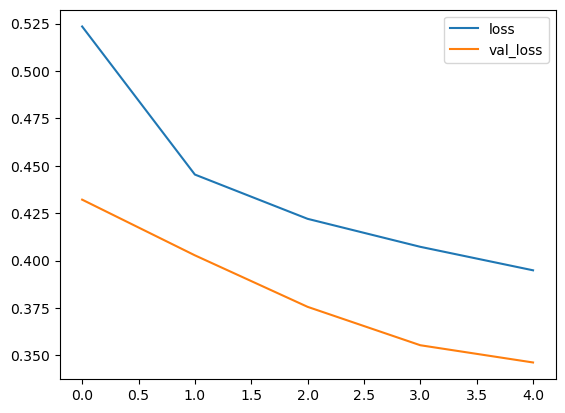

In [ ]:
#Plot the losses
losses_pca = pd.DataFrame(model_pca.history.history)
losses_pca.plot()
plt.show()
#observations:
#The training loss is decreasing and the validation loss is also decreasing
#This shows that the model is not overfitting

In [332]:
#Lets make predictions
predictions_pca = model_pca.predict(X_pca_test)
predict_classes_pca = (predictions_pca > 0.5).astype(int)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step


In [ ]:
#Classification report and confusion matrix
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_classes_pca))
print('Classification Report: \n',classification_report(y_test,predict_classes_pca))
#observations:
#The model has an accuracy of 0.86
#Not bad, but we can still improve the model
# But I think what's the point of using 52 components and not 79 components?
# We could just use the original data set to train the model
#The PCA was helpful only if our features had reduced substantially, which is 
# not the case
#So we can use the original data set to train the model

Confusion Matrix: 
 [[ 4376 11282]
 [   81 63305]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.28      0.44     15658
           1       0.85      1.00      0.92     63386

    accuracy                           0.86     79044
   macro avg       0.92      0.64      0.68     79044
weighted avg       0.88      0.86      0.82     79044



In [ ]:
#Job done for now! 
